# 2023-08-16__STA_conntest_pyjulia

In [1]:
1

1

In [2]:
%time from julia import Pkg

CPU times: total: 2.75 s
Wall time: 3.9 s


In [3]:
%time Pkg.activate("..")

CPU times: total: 750 ms
Wall time: 1.19 s


In [4]:
%time %run lib/util.py

importing mpl … ✔
importing brian … ✔
importing pandas … ✔
CPU times: total: 1.34 s
Wall time: 3.8 s


In [5]:
from julia import Nto1AdEx

In [6]:
%%time
T = 10*minutes
N = 6500
out = Nto1AdEx.sim(N, T/seconds);

CPU times: total: 2.05 s
Wall time: 2.52 s


In [7]:
max(out.rates), min(out.rates)

(97.19702446382104, 0.19539372591355877)

For E and I inputs separately, find the 100 inputs with the highest rate.

In [8]:
i = argmax(out.rates)

4190

In [10]:
%%time
from julia import ConnectionTests
from julia.ConnectionTests import STAHeight, test_conn, calc_STA

CPU times: total: 0 ns
Wall time: 2.35 ms


In [11]:
v = out.V

array([-0.065     , -0.06499912, -0.06499739, ..., -0.05303187,
       -0.05302125, -0.05300938])

In [12]:
times = out.trains[i]

array([4.66839372e-03, 1.48194989e-02, 4.50062529e-02, ...,
       5.99978150e+02, 5.99979932e+02, 5.99983932e+02])

In [13]:
STA = calc_STA(v, times) * volt;

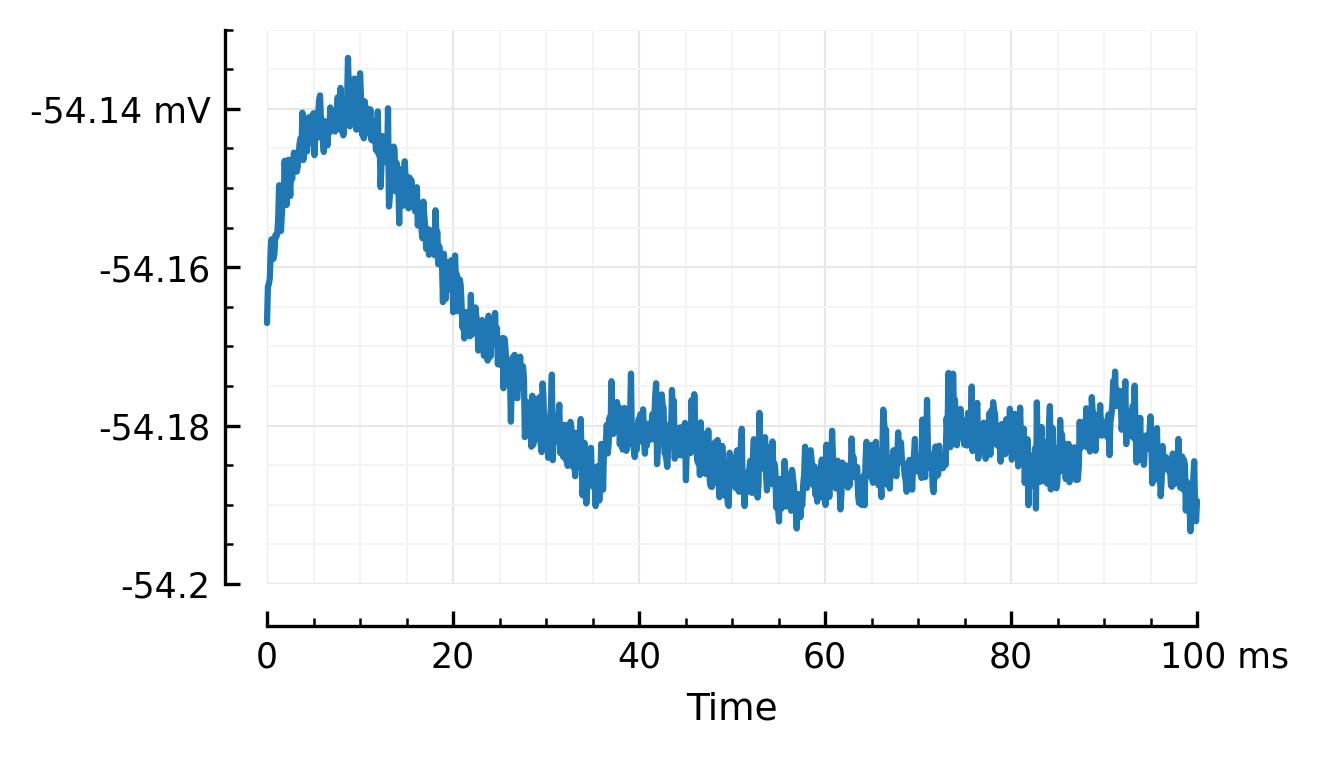

In [14]:
plotsig(STA);

'area over start' is gonna be negative here!

So we'll take a shorter STA length.

About 20 or 30 ms.

Does that correspond to impulse response width?\
Hm interestingly, that's more like 50+ ms

Note that the height _does_ correspond! (To the PSP): 0.4 mV. :)

In [15]:
ConnectionTests.set_STA_length(200); # in # samples. Δt = 0.1 ms

In [16]:
STA = calc_STA(v, times) * volt;

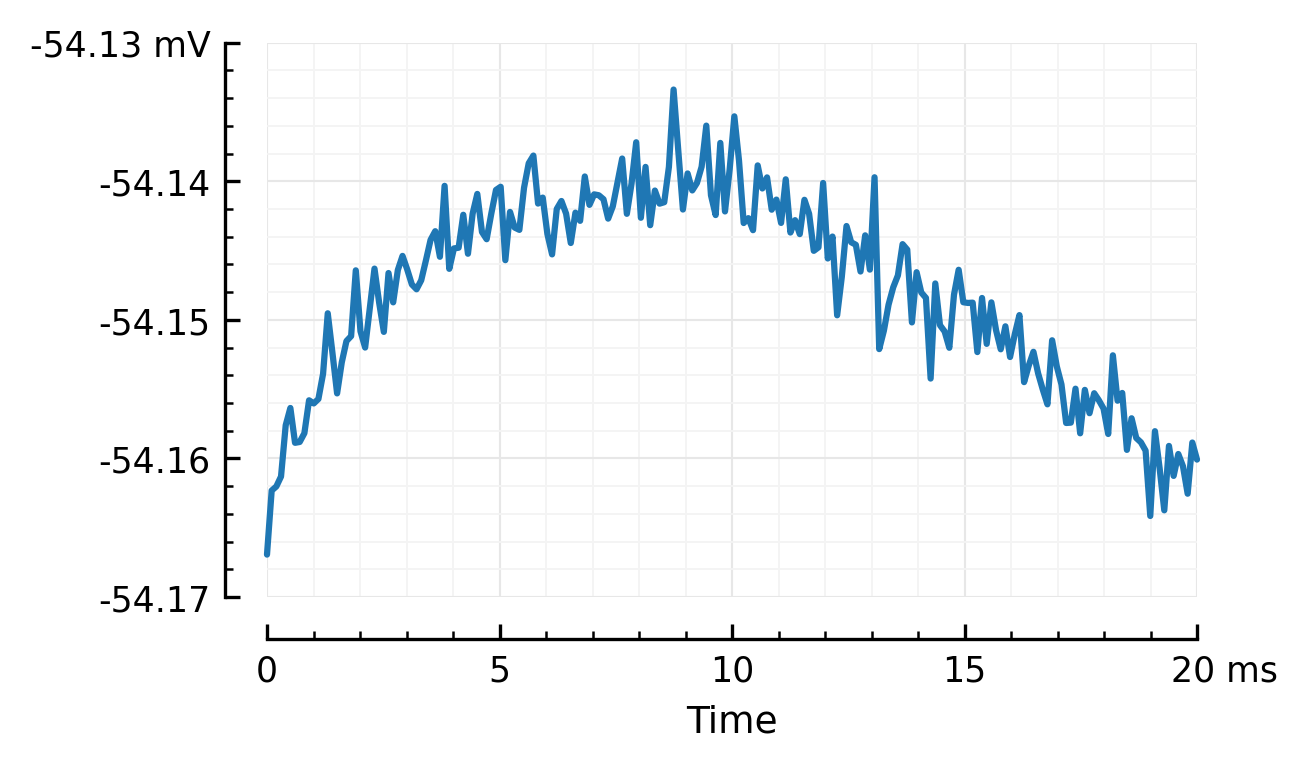

In [17]:
plotsig(STA);

In [24]:
%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


In [37]:
%time test_conn(STAHeight(), v, times)

CPU times: total: 422 ms
Wall time: 530 ms


0.99

In [41]:
%%julia
using ConnectionTests

v = $v
times = $times
@time test_conn(STAHeight(), v, times)

  0.515224 seconds (724 allocations: 134.599 MiB, 3.68% gc time)

0.99

(Note that these timings are an ± upper bound: most input trains have 5+x less spikes, than this one with 97 Hz)

In [20]:
sort(out.rates)[-100:]

array([16.34453709, 16.34586244, 16.35012583, 16.40999991, 16.5609733 ,
       16.56232179, 16.58866738, 16.71020188, 16.77508954, 16.80576946,
       16.81463873, 16.84196824, 16.8669358 , 16.90274395, 16.9513508 ,
       16.99099046, 16.9922075 , 17.08590024, 17.17048212, 17.20337968,
       17.23938582, 17.42468187, 17.49318289, 17.71943011, 17.76454379,
       17.81044294, 17.8439244 , 18.01559909, 18.06203967, 18.11521212,
       18.12774137, 18.18451957, 18.27464165, 18.29553337, 18.62613999,
       18.69266641, 18.71124856, 18.71581644, 18.72211001, 18.81244422,
       18.84301381, 19.11383496, 19.18219156, 19.2448227 , 19.38556595,
       19.42779193, 19.50876128, 19.66741863, 19.70440994, 19.93509877,
       19.99656485, 20.04625663, 20.23897557, 20.27833082, 20.34399713,
       20.64545696, 20.72825593, 20.87498931, 21.08683974, 21.3218399 ,
       21.3539504 , 21.38265805, 21.39999672, 21.41237131, 21.54468981,
       21.59754563, 21.65523396, 21.70152311, 21.84500571, 22.68

In [ ]:
out.trains